In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from utils import loader
from utils import debugger 
from utils import preprocessing as pp 
from utils import misc
import implementations as impl
import cost

In [3]:
error_value = -999.0
seed = 114

## Load the training data into feature matrix, class labels, and event ids:

In [4]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, x, ids = loader.load_csv_data(DATA_TRAIN_PATH)

nb_samples = x.shape[0]
nb_features = x.shape[1]

### Preprocessing

In [5]:
# Cleaned input array by replacing errors with most frequent values
x_clean_mf = pp.clean_data(x, error_value, pp.most_frequent)

# Cleaned input array by replacing errors with mean
x_clean_mean = pp.clean_data(x, error_value, np.mean)

# Cleaned input array by replacing errors with median
x_clean_median = pp.clean_data(x, error_value, np.median)

In [6]:
# Chosen cleaned data
x_clean = x_clean_mf

In [7]:
# Normalised version of the data (without the 1's column)
x_normal = pp.normalise(x_clean)
x_normal.shape

(250000, 30)

In [8]:
# Compute tx : column of ones followed by x
first_col = np.ones((nb_samples, 1))
tx = np.concatenate((first_col, x_normal), axis=1)
tx.shape

(250000, 31)

In [9]:
w_across_impl = {}

In [37]:
# Test for Gradient Descent Least squares.

# Define the parameters of the algorithm.
max_iters = 0
gamma = 10e-2

# Initialization
w_initial = np.ones((31,))

# Debugger
dbg = debugger.Debugger(['loss', 'w', 'gamma'])

# Start gradient descent.
w, loss = impl.least_squares_GD(y, tx, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=True)

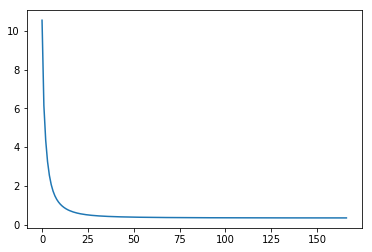

step 1/167:	loss: 10.550218905836317
step 2/167:	loss: 6.142035021968943
step 3/167:	loss: 4.34358384192923
step 4/167:	loss: 3.248483071021142
step 5/167:	loss: 2.5396861564820306
step 6/167:	loss: 2.061847799302481
step 7/167:	loss: 1.7267353692962102
step 8/167:	loss: 1.4828258747665575
step 9/167:	loss: 1.2992968209670277
step 10/167:	loss: 1.1571969155172446
step 11/167:	loss: 1.0445145692256752
step 12/167:	loss: 0.9533873376417997
step 13/167:	loss: 0.8784978834045474
step 14/167:	loss: 0.8161346040124285
step 15/167:	loss: 0.7636294841274185
step 16/167:	loss: 0.7190134142987312
step 17/167:	loss: 0.6807991999891339
step 18/167:	loss: 0.6478411370166752
step 19/167:	loss: 0.6192415792724622
step 20/167:	loss: 0.5942870765293107
step 21/167:	loss: 0.5724036061546303
step 22/167:	loss: 0.553124456264438
step 23/167:	loss: 0.5360667031598054
step 24/167:	loss: 0.520913665123962
step 25/167:	loss: 0.5074016021559294
step 26/167:	loss: 0.4953094910745987
step 27/167:	loss: 0.4844510

In [38]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('-------------------------')
dbg.print('gamma', last_n=0)
w_across_impl['GD_LS'] = w

In [94]:
# Test for Stochastic Gradient Descent Least squares.

# clear debugger
dbg.clear()

# Define the parameters of the algorithm.
max_iters = 200
gamma = 10e-3

# Initialization
w_initial = np.ones((31,))

# Start gradient descent.
w, loss = impl.least_squares_SGD(y, tx, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=False)

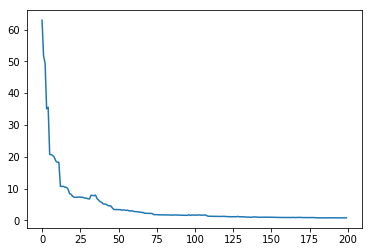

step 1/200:	loss: 62.91220245018552
step 2/200:	loss: 51.670962216095404
step 3/200:	loss: 49.32698733039835
step 4/200:	loss: 35.04066921477253
step 5/200:	loss: 35.55724614160242
step 6/200:	loss: 20.686153714817564
step 7/200:	loss: 20.66740062172842
step 8/200:	loss: 20.357905322717603
step 9/200:	loss: 19.8299264114291
step 10/200:	loss: 18.642086885183396
step 11/200:	loss: 18.257227410061002
step 12/200:	loss: 18.24122160517596
step 13/200:	loss: 10.734285946549065
step 14/200:	loss: 10.659379723224786
step 15/200:	loss: 10.665021204569728
step 16/200:	loss: 10.433675244714998
step 17/200:	loss: 10.333146336984758
step 18/200:	loss: 9.833496664884452
step 19/200:	loss: 8.370119672166897
step 20/200:	loss: 8.175054553637025
step 21/200:	loss: 7.548650561069614
step 22/200:	loss: 7.260921968345956
step 23/200:	loss: 7.238315088510065
step 24/200:	loss: 7.238513904692178
step 25/200:	loss: 7.338396557783509
step 26/200:	loss: 7.260521094744197
step 27/200:	loss: 7.2723094753093935


In [95]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('-------------------------')
dbg.print('gamma', last_n=0)
w_across_impl['SGD_LS'] = w

In [96]:
# Test for Least squares with normal equations.
w, loss = impl.least_squares_old_version(y, tx)

In [97]:
print('loss:', loss)
w_across_impl['NE_LS'] = w
print(np.linalg.norm(w))

loss: 0.33949900557742596
402.7479493918048


In [98]:
eps = 1000
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)

Error between GD_LS and SGD_LS is 1.4779241799767942
Error between GD_LS and NE_LS is 402.57435325231324
Error between GD_LS and LR is 4.3309769270044205
Error between GD_LS and RLR is 3.292220499389856
Error between NE_LS and SGD_LS is 402.5773972114955
Error between NE_LS and RLR is 402.6998804803475
Error between LR and SGD_LS is 4.352489173575258
Error between LR and NE_LS is 402.95192651234754
Error between LR and RLR is 2.084643889822487
Error between RLR and SGD_LS is 3.3737815398893214

Norm of w: 402.7479493918048


## Logistic regression test

In [53]:
np.random.seed(114)

# Random guess 
w = np.random.uniform(0,1,size=nb_features)     
z_ = cost.sigmoid(x_normal @ w)
y_ = misc.get_predictions(z_)

print(misc.accuracy(y, y_))

0.593012


In [85]:
# Test of log reg GD

# Define the parameters of the algorithm.
max_iters = 300
gamma = 1e-7

# Initialization
nb_features = tx.shape[1]
w_initial = np.random.uniform(0,1,size=nb_features)     
dbg = debugger.Debugger(['loss', 'w', 'gamma'])

w, loss = impl.logistic_regression(y, tx, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=False)

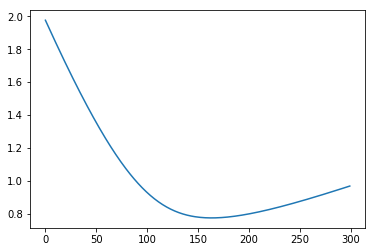

step 1/300:	loss: 1.9759547208396968
step 2/300:	loss: 1.9623723511523385
step 3/300:	loss: 1.9488202287915164
step 4/300:	loss: 1.935305099429776
step 5/300:	loss: 1.9218293780611897
step 6/300:	loss: 1.9083857120881582
step 7/300:	loss: 1.8949836620160265
step 8/300:	loss: 1.8816158505991454
step 9/300:	loss: 1.868285774291612
step 10/300:	loss: 1.8549922968461419
step 11/300:	loss: 1.841740899188755
step 12/300:	loss: 1.8285285251888799
step 13/300:	loss: 1.8153583219085712
step 14/300:	loss: 1.8022305117819717
step 15/300:	loss: 1.7891439813690575
step 16/300:	loss: 1.776099605705537
step 17/300:	loss: 1.7631001526230223
step 18/300:	loss: 1.7501457327497032
step 19/300:	loss: 1.7372373757713226
step 20/300:	loss: 1.72437507153218
step 21/300:	loss: 1.7115603920577307
step 22/300:	loss: 1.6987937421929946
step 23/300:	loss: 1.686077620329708
step 24/300:	loss: 1.673410943787244
step 25/300:	loss: 1.6607940295380401
step 26/300:	loss: 1.648231073308483
step 27/300:	loss: 1.635719335

In [86]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('------------------')
dbg.print('gamma', last_n=0)
w_across_impl['LR'] = w

In [87]:
y_ = misc.predict(tx, w)
print(misc.accuracy(y, y_))

0.710192


In [88]:
# Test of log reg GD

# Define the parameters of the algorithm.
max_iters = 200
gamma = 1e-7
lambda_ = 1e-7

# Initialization
nb_features = tx.shape[1]
w_initial = np.random.uniform(0,1,size=nb_features)     
dbg = debugger.Debugger(['loss', 'w', 'gamma'])

w, loss = impl.reg_logistic_regression(y, tx, lambda_, w_initial, max_iters, gamma, debugger=dbg, dynamic_gamma=False)

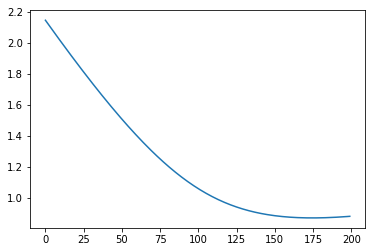

step 1/200:	loss: 2.147467958604634
step 2/200:	loss: 2.133669186924961
step 3/200:	loss: 2.11990194628778
step 4/200:	loss: 2.1061686112757263
step 5/200:	loss: 2.092463243652598
step 6/200:	loss: 2.078791768201674
step 7/200:	loss: 2.065150672144912
step 8/200:	loss: 2.0515448850261797
step 9/200:	loss: 2.0379742638520693
step 10/200:	loss: 2.024435579672793
step 11/200:	loss: 2.0109343334669205
step 12/200:	loss: 1.9974698733503284
step 13/200:	loss: 1.9840425845021017
step 14/200:	loss: 1.9706508770511793
step 15/200:	loss: 1.9573007144363455
step 16/200:	loss: 1.9439889034551012
step 17/200:	loss: 1.9307137109058472
step 18/200:	loss: 1.9174816411025386
step 19/200:	loss: 1.9042913715080971
step 20/200:	loss: 1.8911436623278488
step 21/200:	loss: 1.8780364168322787
step 22/200:	loss: 1.8649759565031772
step 23/200:	loss: 1.8519587548760554
step 24/200:	loss: 1.8389880505093747
step 25/200:	loss: 1.826062364895598
step 26/200:	loss: 1.8131838068228308
step 27/200:	loss: 1.800353478

In [89]:
dbg.plot('loss')
dbg.print('loss', last_n=0)
print('------------------')
dbg.print('gamma', last_n=0)
w_across_impl['RLR'] = w

In [90]:
eps = 1000
norm_w = np.linalg.norm(w)
n_impl = len(w_across_impl)

for i, impl1 in enumerate(w_across_impl):
    for j, impl2 in enumerate(w_across_impl):
        if(impl1 < impl2):
            error = np.linalg.norm(w_across_impl[impl1] - w_across_impl[impl2])
            print('Error between', impl1, 'and', impl2, 'is', error)
            assert error < eps
                
print('\nNorm of w:', norm_w)

Error between GD_LS and SGD_LS is 1.322673612010844
Error between GD_LS and NE_LS is 402.5740050738599
Error between GD_LS and LR is 4.3309769270044205
Error between GD_LS and RLR is 3.292220499389856
Error between NE_LS and SGD_LS is 402.57641362331094
Error between NE_LS and RLR is 402.69953231565825
Error between LR and SGD_LS is 4.410428186688025
Error between LR and NE_LS is 402.9515783560212
Error between LR and RLR is 2.084643889822487
Error between RLR and SGD_LS is 3.5057465423635783

Norm of w: 3.7180981216524094
